In [1]:
import os
import scipy.io
import numpy as np
import pandas as pd
import pyvista as pv
import matplotlib.pyplot as plt
from scipy import interpolate
from brainrender import Scene
from brainrender import settings
from brainrender.actors import Volume
from mpl_toolkits.mplot3d import Axes3D
from vedo import embedWindow, Plotter, show, mesh
from brainrender._colors import get_random_colors

In [2]:
directory = r'C:\Users\shirahad\Documents\research\electrophysiology\analyze_electrophysiology_data\mapping\files\PHb_volume'

In [3]:
probe_coordinates_files = ['DMS0_probe_points_electrode_track.mat', 'NaC1_probe_points_electrode_track.mat', 'PFC1_probe_points_electrode_track.mat', 'PFC2_probe_points_electrode_track.mat', 'CONTROL7_Right_probe_points_electrode_track.mat', 'CONTROL6_Right_probe_points_electrode_track.mat'] #, 'PFC3_probe_points_electrode_track.mat']

In [25]:
def get_probe(probe_number, probe_coordinates):
    return pd.DataFrame(probe_coordinates['pointList'][0][0][0][probe_number - 1][0], columns=['ML', 'DV', 'AP'])

In [63]:
right_probe_df = pd.DataFrame()
left_probe_df = pd.DataFrame()

for f in probe_coordinates_files:
    probe_coordinates = scipy.io.loadmat(os.path.join(directory, f))
    right_probe_coordinates = get_probe(1, probe_coordinates)
    #left_probe_coordinates = get_probe(2, probe_coordinates)
    right_probe_df = right_probe_coordinates if right_probe_df.empty else right_probe_df.append(right_probe_coordinates)
    right_probe_df = right_probe_df.reset_index(drop=True)
    #left_probe_df = left_probe_coordinates if left_probe_df.empty else left_probe_df.append(left_probe_coordinates)
    #left_probe_df = left_probe_df.reset_index(drop=True)

In [64]:
probe_coordinates['pointList'][0][0][0][0][0]

array ([[ 634 , 366 , 720 ] ,
 [ 646 , 345 , 720 ] ,
 [ 667 , 322 , 720 ] ,
 [ 672 , 309 , 720 ] ,
 [ 691 , 300 , 720 ] ,
 [ 709 , 291 , 720 ] ,
 [ 668 , 292 , 720 ] ,
 [ 646 , 297 , 720 ] ,
 [ 649 , 307 , 720 ] ,
 [ 650 , 325 , 720 ] ,
 [ 637 , 336 , 720 ] ,
 [ 630 , 350 , 720 ] ,
 [ 633 , 361 , 714 ] ,
 [ 643 , 340 , 714 ] ,
 [ 651 , 320 , 714 ] ,
 [ 663 , 303 , 714 ] ,
 [ 684 , 288 , 714 ] ,
 [ 704 , 276 , 714 ] ,
 [ 670 , 284 , 714 ] ,
 [ 645 , 295 , 714 ] ,
 [ 637 , 311 , 714 ] ,
 [ 635 , 326 , 714 ] ,
 [ 629 , 344 , 714 ] ,
 [ 641 , 352 , 708 ] ,
 [ 647 , 330 , 708 ] ,
 [ 656 , 308 , 708 ] ,
 [ 662 , 296 , 708 ] ,
 [ 679 , 287 , 708 ] ,
 [ 697 , 278 , 708 ] ,
 [ 647 , 292 , 708 ] ,
 [ 633 , 300 , 708 ] ,
 [ 638 , 315 , 708 ] ,
 [ 634 , 330 , 708 ] ,
 [ 631 , 344 , 708 ] ,
 [ 633 , 360 , 702 ] ,
 [ 641 , 348 , 702 ] ,
 [ 649 , 342 , 702 ] ,
 [ 658 , 345 , 702 ] ,
 [ 664 , 358 , 702 ] ,
 [ 670 , 337 , 702 ] ,
 [ 667 , 317 , 702 ] ,
 [ 668 , 303 , 702 ] ,
 [ 687 , 293 , 702 ] ,
 [ 715 , 281 , 702 ] ,
 [ 671 , 291 , 702 ] ,
 [ 651 , 296 , 702 ] ,
 [ 631 , 301 , 702 ] ,
 [ 645 , 315 , 702 ] ,
 [ 649 , 325 , 702 ] ,
 [ 617 , 361 , 696 ] ,
 [ 634 , 345 , 696 ] ,
 [ 645 , 338 , 696 ] ,
 [ 652 , 345 , 696 ] ,
 [ 659 , 354 , 696 ] ,
 [ 658 , 332 , 696 ] ,
 [ 660 , 319 , 696 ] ,
 [ 654 , 304 , 696 ] ,
 [ 666 , 295 , 696 ] ,
 [ 696 , 281 , 696 ] ,
 [ 629 , 303 , 696 ] ,
 [ 637 , 313 , 696 ] ,
 [ 638 , 326 , 696 ] ,
 [ 622 , 360 , 690 ] ,
 [ 642 , 350 , 690 ] ,
 [ 660 , 360 , 690 ] ,
 [ 659 , 344 , 690 ] ,
 [ 655 , 328 , 690 ] ,
 [ 659 , 311 , 690 ] ,
 [ 678 , 299 , 690 ] ,
 [ 700 , 289 , 690 ] ,
 [ 660 , 300 , 690 ] ,
 [ 638 , 308 , 690 ] ,
 [ 637 , 322 , 690 ] ,
 [ 638 , 333 , 690 ] ,
 [ 631 , 345 , 690 ] ,
 [ 623 , 361 , 684 ] ,
 [ 643 , 345 , 684 ] ,
 [ 658 , 360 , 684 ] ,
 [ 655 , 342 , 684 ] ,
 [ 650 , 322 , 684 ] ,
 [ 654 , 309 , 684 ] ,
 [ 666 , 304 , 684 ] ,
 [ 687 , 299 , 684 ] ,
 [ 643 , 303 , 684 ] ,
 [ 630 , 309 , 684 ] ,
 [ 641 , 328 , 684 ] ,
 [ 625 , 353 , 678 ] ,
 [ 639 , 349 , 678 ] ,
 [ 649 , 360 , 678 ] ,
 [ 654 , 338 , 678 ] ,
 [ 655 , 324 , 678 ] ,
 [ 659 , 303 , 678 ] ,
 [ 676 , 296 , 678 ] ,
 [ 692 , 295 , 678 ] ,
 [ 639 , 313 , 678 ] ,
 [ 643 , 326 , 678 ] ,
 [ 642 , 336 , 678 ] ,
 [ 618 , 367 , 672 ] ,
 [ 630 , 352 , 672 ] ,
 [ 639 , 350 , 672 ] ,
 [ 645 , 360 , 672 ] ,
 [ 652 , 367 , 672 ] ,
 [ 650 , 344 , 672 ] ,
 [ 652 , 328 , 672 ] ,
 [ 659 , 312 , 672 ] ,
 [ 668 , 304 , 672 ] ,
 [ 679 , 301 , 672 ] ,
 [ 638 , 311 , 672 ] ,
 [ 626 , 313 , 672 ] ,
 [ 635 , 330 , 672 ]] , dtype = uint16 )

In [65]:
temp = right_probe_df.copy()

In [67]:
temp.to_csv('{}\phb_volume_points.csv'.format(directory), sep=',', encoding='utf-8')

# open3d

In [ ]:
import open3d as o3d

In [ ]:
pcd1 = o3d.geometry.PointCloud()
pcd1.points = o3d.utility.Vector3dVector(probe_coordinates['pointList'][0][0][0][0][0] * 10)

In [ ]:
pcd1.points

In [ ]:
o3d.visualization.draw_geometries([pcd1])

In [ ]:
pcd1.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

### Ball-Pivoting Algorithm

In [ ]:
distances = pcd1.compute_nearest_neighbor_distance()
avg_dist = np.mean(distances)
radius = 3 * avg_dist

In [ ]:
bpa_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(pcd1, o3d.utility.DoubleVector([radius, radius * 2]))

In [ ]:
dec_mesh = bpa_mesh.simplify_quadric_decimation(100000)

In [ ]:
dec_mesh.remove_degenerate_triangles()
dec_mesh.remove_duplicated_triangles()
dec_mesh.remove_duplicated_vertices()
dec_mesh.remove_non_manifold_edges()

In [ ]:
o3d.visualization.draw_geometries([dec_mesh])

In [ ]:
import trimesh

In [ ]:
tri_mesh = trimesh.Trimesh(np.asarray(dec_mesh.vertices), np.asarray(dec_mesh.triangles),
                          vertex_normals=np.asarray(dec_mesh.vertex_normals))

In [ ]:
trimesh.convex.is_convex(tri_mesh)

In [ ]:
tri_mesh

### Poisson’s reconstruction

In [ ]:
poisson_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd1, depth=8, width=0, scale=1.1, linear_fit=False)[0]

In [ ]:
bbox = pcd1.get_axis_aligned_bounding_box()
p_mesh_crop = poisson_mesh.crop(bbox)

In [ ]:
p_mesh_crop

In [ ]:
poisson_mesh

In [ ]:
dec_poisson_mesh = p_mesh_crop.simplify_quadric_decimation(100000)

In [ ]:
dec_poisson_mesh.remove_degenerate_triangles()
dec_poisson_mesh.remove_duplicated_triangles()
dec_poisson_mesh.remove_duplicated_vertices()
dec_poisson_mesh.remove_non_manifold_edges()

In [ ]:
o3d.visualization.draw_geometries([dec_poisson_mesh])

In [ ]:
o3d.io.write_triangle_mesh(directory + "bpa_mesh.ply", dec_mesh)
o3d.io.write_triangle_mesh(directory + "p_mesh_c.ply", p_mesh_crop)

In [ ]:
def lod_mesh_export(mesh, lods, extension, path):
    mesh_lods={}
    for i in lods:
        mesh_lod = mesh.simplify_quadric_decimation(i)
        o3d.io.write_triangle_mesh(path+"lod_"+str(i)+extension, mesh_lod)
        mesh_lods[i]=mesh_lod
    print("generation of "+str(i)+" LoD successful")
    return mesh_lods

In [ ]:
my_lods = lod_mesh_export(bpa_mesh, [100000,50000,10000,1000,100], ".ply", directory)

In [ ]:
my_lods2 = lod_mesh_export(bpa_mesh, [8000,800,300], ".ply", directory)

In [ ]:
o3d.visualization.draw_geometries([my_lods[100]])

# Meshgrid

In [30]:
right_probe_df = right_probe_df * 10

In [31]:
right_probe_df

,ML,DV,AP
0,6470,3250,6460
1,6410,3120,6470
2,6520,3110,6460
3,6490,3210,6580
4,6430,3090,6590
...,...,...,...
626,6680,3040,6720
627,6790,3010,6720
628,6380,3110,6720
629,6260,3130,6720


In [32]:
x = right_probe_df['AP'].to_numpy()
y = right_probe_df['DV'].to_numpy()
z = right_probe_df['ML'].to_numpy()

xv = np.linspace(min(x), max(x), 50)
yv = np.linspace(min(y), max(y), 50)
[X,Y] = np.meshgrid(xv, yv)

In [51]:
Z = interpolate.griddata((x, y), z, (X, Y), method='cubic')

< mpl_toolkits.mplot3d.art3d.Line3DCollection object at 0x000002BB08DC8160 >

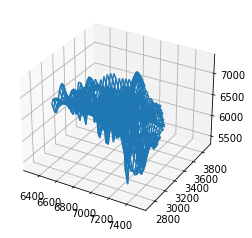

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z)

# Pyvista

In [53]:
# create the unstructured grid directly from the numpy arrays and plot
grid = pv.StructuredGrid(X, Y, Z)

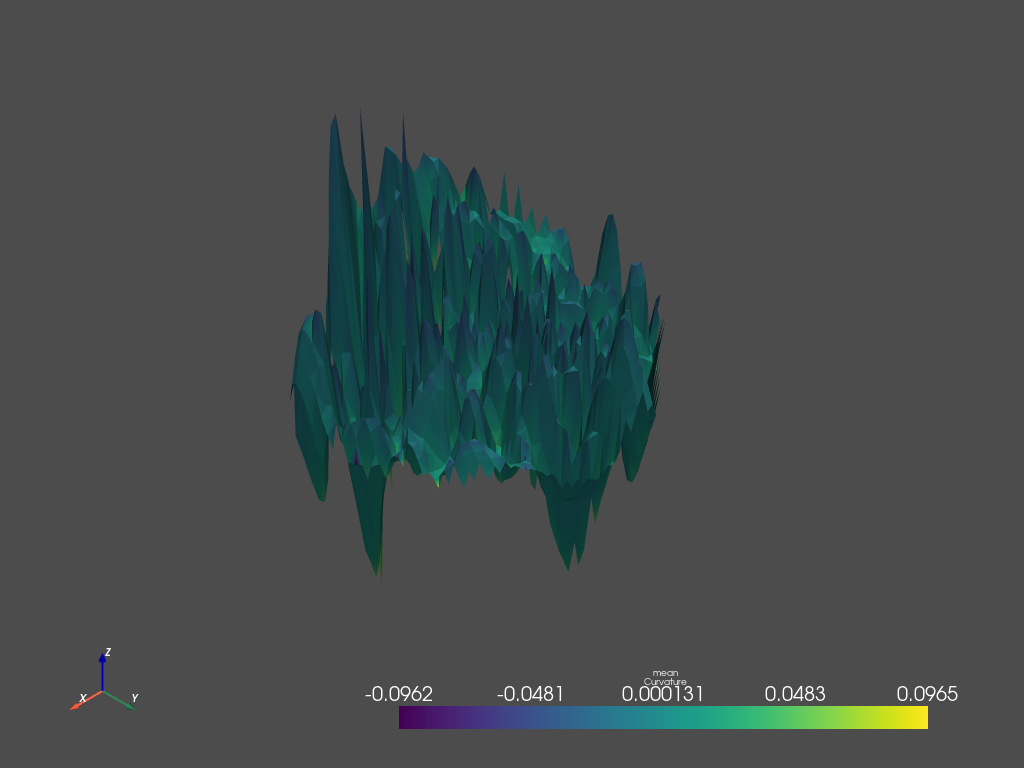

[( 9859.123615192593 , 6254.123615192593 , 9321.747641137445 ) ,
 ( 6910.0 , 3305.0 , 6372.624025944851 ) ,
 ( 0.0 , 0.0 , 1.0 )]

In [54]:
grid.plot_curvature()

In [55]:
vedo_mesh = mesh.Mesh(grid)

In [56]:
smoothed_vedo_mesh = vedo_mesh.smoothLaplacian(niter=2000, relaxfact=0.1, edgeAngle=15, featureAngle=60)
#vedo_mesh.fillHoles().smoothLaplacian(niter=1000) #.smoothLaplacian(niter=20, relaxfact=0.1, edgeAngle=15, featureAngle=60)

In [57]:
smoothed_vedo_mesh

( Mesh ) 000002BB081138E0

In [58]:
brain_regions = ['LH', 'DG', 'MD']

In [59]:
scene = Scene('mesh')

scene.add(smoothed_vedo_mesh)
[scene.add_brain_region(region, alpha=0.2, color=get_random_colors()) for region in brain_regions]
scene.render()

embedWindow('k3d')

scene.jupyter = True

plotter = Plotter()
plotter.show(*scene.renderables)

Error in silhouette(): direction is [None]
 render the scene with show() or specify camera/direction
Error in silhouette(): direction is [None]
 render the scene with show() or specify camera/direction
Error in silhouette(): direction is [None]
 render the scene with show() or specify camera/direction
Error in silhouette(): direction is [None]
 render the scene with show() or specify camera/direction


Your scene is ready for rendering, use: `show ( scene.renderables ) `

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[6771.671281616228,…

In [ ]:
# 1. load the data
print("Loading data")
#data = imio.load.load_any(datafile)
data = smoothed_vedo_mesh

# 2. aligned the data to the scene's atlas' axes
print("Transforming data")
scene = Scene(atlas_name="allen_mouse_100um")

source_space = AnatomicalSpace(
    "asr" # anterior, superior, right
)  # for more info: https://docs.brainglobe.info/bg-space/usage
target_space = scene.atlas.space
transformed_stack = source_space.map_stack_to(target_space, data)

# 3. create a Volume vedo actor and smooth
print("Creating volume")
vol = Volume(transformed_stack, origin=scene.root.origin()).medianSmooth()


# 4. Extract a surface mesh from the volume actor
print("Extracting surface")
SHIFT = [-20, 15, 30]  # fine tune mesh position
mesh = (
    vol.isosurface(threshold=20)
    .c(blue_grey)
    .decimate()
    .clean()
    .addPos(dp_x=SHIFT)
)

# 5. render
print("Rendering")
scene.add(mesh)
scene.render(zoom=13)